 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_6/Lecture_6_2.ipynb)
 
 <h1 align="center">K- Nearest neighbors</h1>


The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems.

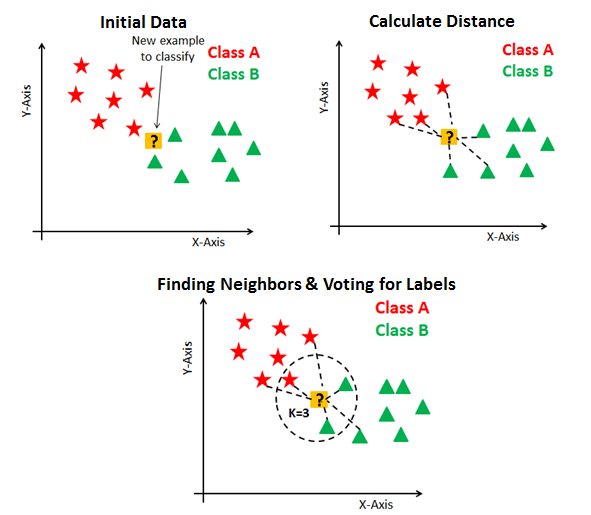

## Task
The objective is to classify according to the altitude above sea level, the balance and aftertaste of the cup of coffee, if that specficic coffee was grown in Colombia, Taiwan or Guatemala. These 3 countries have been chosen because they have similar coffee quality levels, but with different environmental contexts. The KNN will be created from scratch in order to find the optimal k value. After that, the scikitlearn version of KNN algrotihm is used. The classification indicators and the confusion matrix are used as quality indicators.


### Visualization  of the data

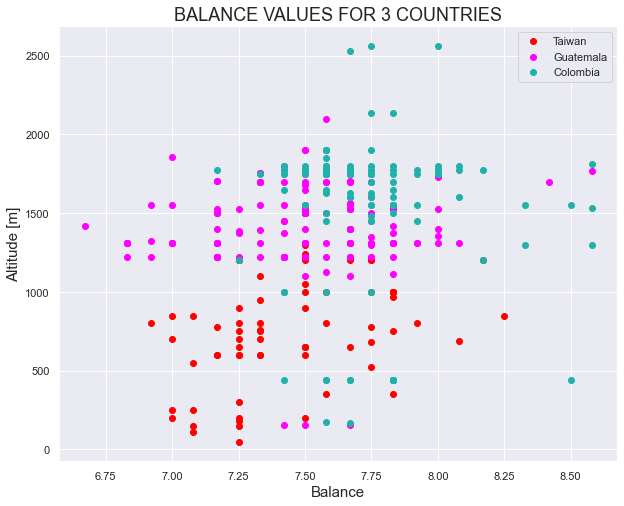

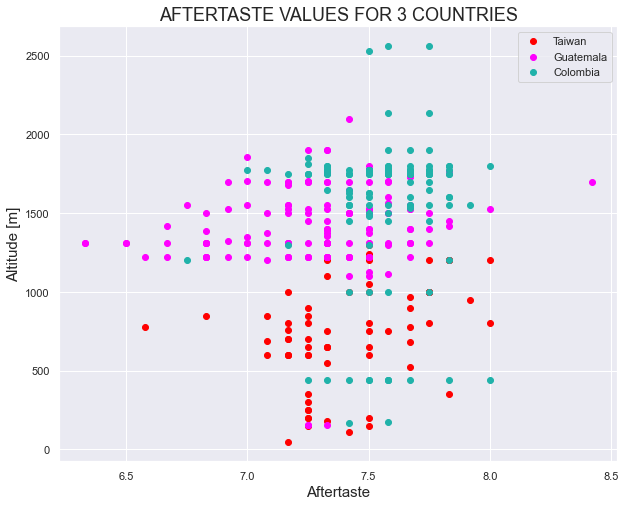

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
cafe = pd.read_csv("coffee_data.csv")
cafe.rename(columns = {'Country.of.Origin':'Country', 'Total.Cup.Points':'Total_points'}, inplace = True)

# Plot the data
countries = ["Taiwan", "Guatemala","Colombia"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for country, color in zip(countries, colors):
    temp_df = cafe[cafe.Country == country]
    ax.scatter(temp_df.Balance,
               temp_df.altitude_mean_meters,
               c = color,
               label = country, 
               )
    
ax.set_xlabel("Balance", fontsize = 15)
ax.set_ylabel("Altitude [m]", fontsize = 15)
ax.set_title("BALANCE VALUES FOR 3 COUNTRIES", fontsize = 18)
ax.legend()
plt.show()

fig2, ax2 = plt.subplots(figsize = (10, 8))
for country, color in zip(countries, colors):
    temp_df2 = cafe[cafe.Country == country]
    ax2.scatter(temp_df2.Aftertaste,
               temp_df2.altitude_mean_meters,
               c = color,
               label = country, 
               )
    
ax2.set_xlabel("Aftertaste", fontsize = 15)
ax2.set_ylabel("Altitude [m]", fontsize = 15)
ax2.set_title("AFTERTASTE VALUES FOR 3 COUNTRIES", fontsize = 18)
ax2.legend()

plt.show()

The prvoius plots shows that the coffee balance and aftertaste values are similar for these three countries (although Colombian coffee in average has higher balance and aftertaste score), but the coffees are grown at different altitudes. In general, Colombia and Guatemala coffee are grown in higher altitude compared to Taiwan. but the environmental condition are very similar in south and central america, specially in intermedial altitute mountains. This makes the classification task quite complex. We will test the KNN algorithm for this complicated classification task. 

### Getting the optimal k value from scratch 

In [7]:
from sklearn.model_selection import train_test_split

values=['Taiwan', 'Guatemala','Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
    
X = cafe_filter[["Balance", "Aftertaste",
          "altitude_mean_meters"]].to_numpy()

y = cafe_filter["Country"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [8]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [9]:
#Predict the value using KNN algorithm

def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [10]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))


In [11]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/len(test_features)

In [12]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 6)

[[array([  7.17,   7.17, 600.  ]), 'Taiwan', 0.08000000000000007],
 [array([  7.25,   7.08, 600.  ]), 'Taiwan', 0.08999999999999986],
 [array([  7.17,   7.25, 600.  ]), 'Taiwan', 0.1131370849898477],
 [array([  7.33,   7.25, 600.  ]), 'Taiwan', 0.1131370849898477],
 [array([  7.5,   7.5, 600. ]), 'Taiwan', 0.4140048308896891],
 [array([  7.25,   7.25, 650.  ]), 'Taiwan', 50.00006399995904]]

In [13]:
#getting the erros for differents k values

possible_k = [x for x in range(2, 60, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

#### Finding the optimal k value 

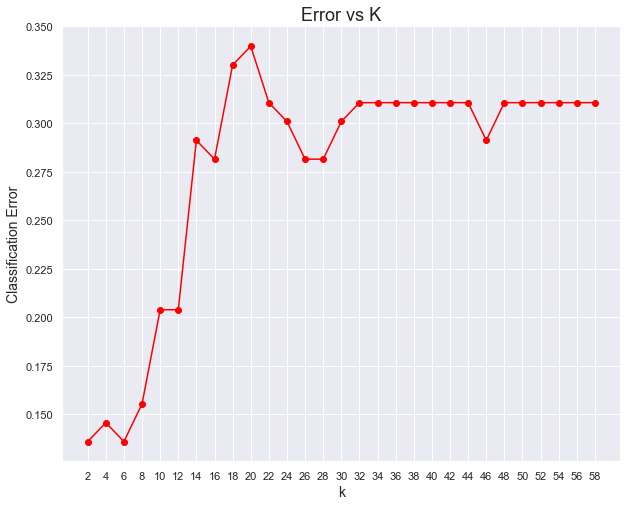

In [15]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.title("Error vs K", fontsize = 18)
plt.show()

#### Minimun error occurs with k=6

In [16]:
classification_error(X_test, y_test, X_train, y_train, 6)

0.13592233009708737

In [17]:
KNN_Predict(X_test[5], X_train, y_train, 6)

'Colombia'

A k value of 6 for the minimun error is obtained. This value will be use for the KNN using Scikitlearn library

## Clasification task using scikitlearn library


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors =6)

In [20]:
# Feeding the model
knn.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [21]:
# Predict the value for X_test
y_pred = knn.predict (X_test)

In [22]:
# Print Accuracy
print ("Training Accuracy:", knn.score(X_train, y_train))
print ("Testing  Accuracy:", knn.score(X_test, y_test))

Training Accuracy: 0.8949579831932774
Testing  Accuracy: 0.8446601941747572


In [23]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

    Colombia       0.73      0.88      0.80        34
   Guatemala       0.94      0.83      0.88        54
      Taiwan       0.86      0.80      0.83        15

    accuracy                           0.84       103
   macro avg       0.84      0.84      0.84       103
weighted avg       0.86      0.84      0.85       103



In [24]:
print (confusion_matrix(y_test, y_pred))

[[30  2  2]
 [ 9 45  0]
 [ 2  1 12]]


Text(0.5, 1.0, 'Confusion matrix KNN')

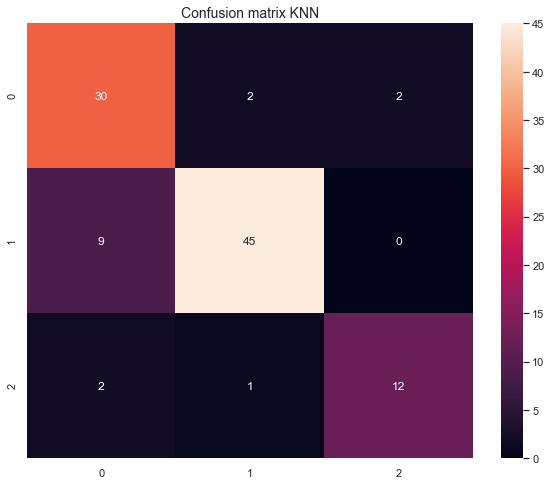

In [25]:
fig = plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion matrix KNN',fontsize=14)

## Result

The KNN algorith gets a testing accuray of 84%, and can predict a Colombian coffee from the database with a 73% of precisison. The result is relatively good considering how complex this classification is; the balance and aftertaste score ranges are similar for the 3 countries and some coffee samples from Colombia have altitude levels very similar to Guatemala and even taiwan, which makes the classification task more complex (I kept that lower altitude values on purpose). In the next projects, we will explore the results for classification using these and other parameters trying to improve the classification percentages of Colombian coffee.